In [2]:
# add flow box

import pandas as pd
df = pd.read_csv('df.csv')
df

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,ds,y
0,1/1/2014,61671967
1,2/1/2014,62274659
2,3/1/2014,64270142
3,4/1/2014,64430235
4,5/1/2014,66423553
...,...,...
103,8/1/2022,90606454
104,9/1/2022,91162800
105,10/1/2022,91614614
106,11/1/2022,92095810


In [3]:
df.dtypes

# split the data into training and testing data in order, then calculate the mae and r2 to see general performance

import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from prophet import Prophet

C:\Users\Owner\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# assuming your dataframe df is defined
df['ds'] = pd.to_datetime(df['ds']) # convert ds to datetime

In [5]:
# create the train/test split
train_size = int(0.8 * len(df))  # 80% of data as training
df_train = df[:train_size]
df_test = df[train_size:]

In [6]:

# define and fit the model to the training data
model = Prophet()
model.fit(df_train)

11:18:37 - cmdstanpy - INFO - Chain [1] start processing
11:18:38 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# make predictions on the test set
forecast = model.predict(df_test.drop(columns='y'))

In [8]:

# evaluate the model using MAE and R2
mae = mean_absolute_error(df_test['y'], forecast['yhat'])
r2 = r2_score(df_test['y'], forecast['yhat'])

print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

MAE: 1471691.248
R2: 0.789


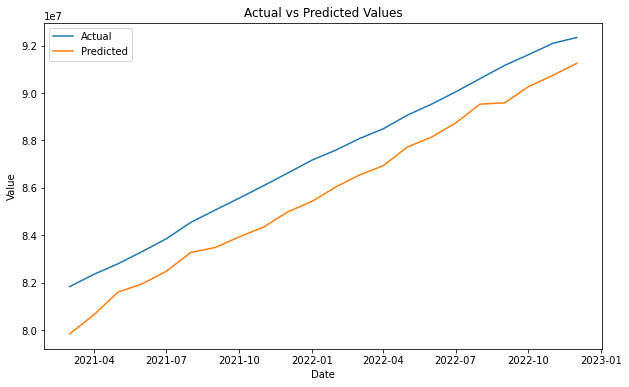

In [9]:
# visualize the actual vs predicted values using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Convert Series to numpy arrays before plotting
plt.plot(df_test['ds'].to_numpy(), df_test['y'].to_numpy(), label='Actual')
plt.plot(df_test['ds'].to_numpy(), forecast['yhat'].to_numpy(), label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [10]:
#One way to detect overfitting is by comparing the error on the training set with the error on the test set. If the training error is significantly lower than the test error, it is a sign of overfitting.

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
# assuming your dataframe df is defined
df['ds'] = pd.to_datetime(df['ds']) # convert ds to datetime

In [12]:
# create the train/test split
train_size = int(0.8 * len(df))  # 80% of data as training
df_train = df[:train_size]
df_test = df[train_size:]

In [13]:
# define and fit the model to the training data
model = Prophet()
model.fit(df_train)

11:18:47 - cmdstanpy - INFO - Chain [1] start processing
11:18:48 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# make predictions on the test set
forecast_test = model.predict(df_test.drop(columns='y'))
forecast_train = model.predict(df_train.drop(columns='y'))

In [15]:
# evaluate the model using MAE and R2 for both train and test sets
mae_train = mean_absolute_error(df_train['y'], forecast_train['yhat'])
r2_train = r2_score(df_train['y'], forecast_train['yhat'])

mae_test = mean_absolute_error(df_test['y'], forecast_test['yhat'])
r2_test = r2_score(df_test['y'], forecast_test['yhat'])

print('Train MAE: %.3f' % mae_train)
print('Train R2: %.3f' % r2_train)

print('Test MAE: %.3f' % mae_test)
print('Test R2: %.3f' % r2_test)

Train MAE: 551208.014
Train R2: 0.955
Test MAE: 1471691.248
Test R2: 0.789


In [16]:
# we see Train MAE: 551208.014
#Train R2: 0.955
#Test MAE: 1471691.248
#Test R2: 0.789    so it's overfitting

# make predictions for next 10 years

# create a future dataframe for 10 years
future = model.make_future_dataframe(periods=10*365)

In [17]:
# make predictions for the next 10 years
forecast = model.predict(future)

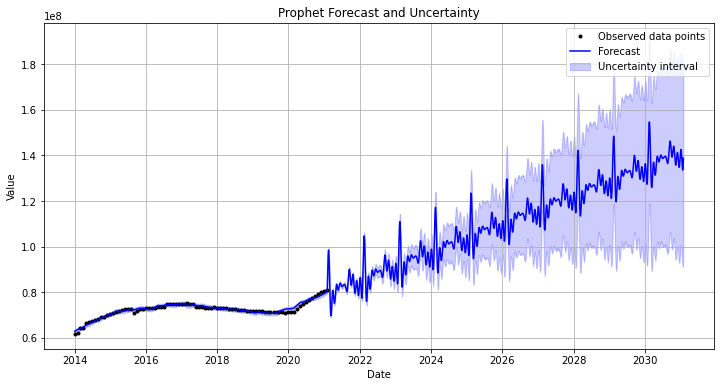

In [18]:
import numpy as np
# Extract data from the model and forecast objects
history_dates = np.array(model.history['ds'])
forecast_dates = np.array(forecast['ds'])
history_y = np.array(model.history['y'])
forecast_yhat = np.array(forecast['yhat'])
forecast_yhat_upper = np.array(forecast['yhat_upper'])
forecast_yhat_lower = np.array(forecast['yhat_lower'])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the historical data
plt.plot(history_dates, history_y, 'k.', label='Observed data points')

# Plot the forecast
plt.plot(forecast_dates, forecast_yhat, color='blue', label='Forecast')

# Plot the uncertainty intervals
plt.fill_between(forecast_dates, forecast_yhat_upper, forecast_yhat_lower, color='blue', alpha=0.2, label='Uncertainty interval')

# Labeling, legend, and show
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Forecast and Uncertainty')
plt.legend()
plt.grid(True)
plt.show()